<a href="https://colab.research.google.com/github/bandaian/Applied_Data_Science/blob/main/CIS6005_Computational_Intelligence_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Part One
# Backpropagation Algorithm Development and Testing

## Objectives
To develop and train a neural network-based classifier for breast cancer diagnosis using fine needle aspiration (FNA) biopsy and discuss the application of fuzzy logic and evolutionary computing algorithms to the same application.

This assignment is split into two parts…

* Part 1 is about implementing and training a multilayer feedforward neural network to classify breast cells as benign or malignant based on various features of extracted breast cells.

* Part 2 is about applying computational intelligence techniques to classify breast cells as benign or malignant based on various features of extracted breast cells. 



# Background

Breast cancer is the most common type of cancer in UK. Nearly 50,000 women were diagnosed with invasive breast cancer in UK in 2011 [1]. About one in eight women are diagnosed with breast cancer during their lifetime [1]. Thanks to the advance in medicine, there is a good chance of recovery if it is detected in its early stages.

One method of breast cancer diagnosis is called fine needle aspiration (FNA) biopsy, which is a common diagnostic procedure used to investigate superficial lumps or masses. A thin and hollow needle is inserted into the mass for cell sampling. Extracted cells are then stained and examined under microscope. Various features of the cell nuclei are computed based on the digitized images of the microscopic image of extracted cells. The extracted cells are then diagnosed by doctors as Benign (normal cells) or Malignant (cancerous cells) based on the characteristics and features of the cell nuclei. Figure 1 shows benign and malignant breast cell samples.


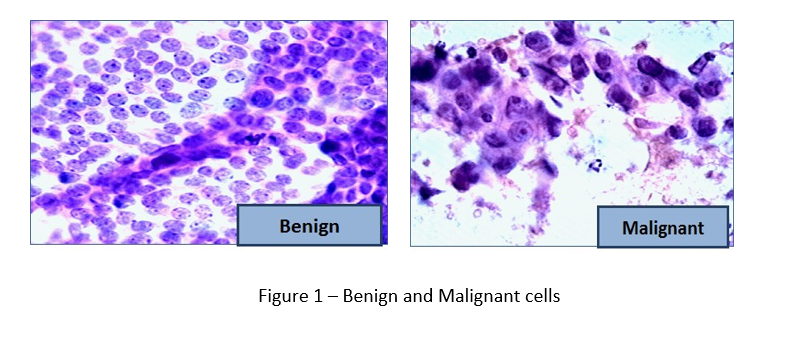

# Dataset

We train neural networks for breast cells classification based on a benchmark dataset donated by University of Wisconsin [3]. This dataset is available at the link http://archive.ics.uci. edu/ml/machine-learning-databases/breast-cancer-wisconsin/

The dataset is saved in a comma-separated values (CSV) format as a text file.

 There are 569 instances stored in the dataset and each instance is stored in a line of the file. 

Each line saves 32 attributes of an instance (numerical features computed based a digitized microscopic image of extracted cell sample). 

The first and second attributes are Image ID and Diagnosis (either M=malignant or B=benign) respectively. 

The remaining 30 attributes are three groups of 10 numeric features computed from the digitized microscopic image of an instance and the three groups are mean, standard error and worst (or largest) of the 10 numeric features. 

The 10 features are listed as follows:

1.	Cell radius
2.	Texture
3.	Perimeter
4.	Area
5.	Smoothness
6.	Compactness
7.	Concavity
8.	Number of Concave points on perimeter
9.	Symmetry
10.	Fractal Dimension

For example, attributes 5, 15 and 25 give the mean perimeter, the standard error of perimeter and the largest perimeter of an instance respectively. All numeric features are stored with four significant digit.


# Packages

In [149]:
# Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want to look at the plotted figures in the notebook
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Importing Data

In [150]:
# Importing the data
df = pd.read_csv("/content/breast_cancer_data_clean.csv")

# View the top of the data
df.head()

,image_id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,2,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,3,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,4,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,5,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Inspect the data

## Shape of the data

In [ ]:
df.shape

(569, 32)

## Missing values

In [ ]:
df.isnull().sum()

image_id                   0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## General overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   image_id                 569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Column names

In [ ]:
list(df.columns)

['image_id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

## Summary statistics

In [ ]:
# statistical distribution of various features
df.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
image_id,569.0,285.00,164.40,1.00,143.00,285.00,427.00,569.00
radius_mean,569.0,14.13,3.52,6.98,11.70,13.37,15.78,28.11
texture_mean,569.0,19.29,4.30,9.71,16.17,18.84,21.80,39.28
perimeter_mean,569.0,91.97,24.30,43.79,75.17,86.24,104.10,188.50
area_mean,569.0,654.89,351.91,143.50,420.30,551.10,782.70,2501.00
smoothness_mean,569.0,0.10,0.01,0.05,0.09,0.10,0.11,0.16
compactness_mean,569.0,0.10,0.05,0.02,0.06,0.09,0.13,0.35
concavity_mean,569.0,0.09,0.08,0.00,0.03,0.06,0.13,0.43
concave points_mean,569.0,0.05,0.04,0.00,0.02,0.03,0.07,0.20
symmetry_mean,569.0,0.18,0.03,0.11,0.16,0.18,0.20,0.30


## Unique values in ID column

In [ ]:
df['image_id'].nunique()

# it shows that all the data are unique that is., each and every row contains information of a cancerous cell is unique

569

## Quick glimpse of tumor features in relation to diagnosis

In [ ]:
# Quick glimpse of tumor features in relation to diagnosis
df.groupby('diagnosis').mean()

,image_id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,320.89916,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,224.54717,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [ ]:
# For differential diagnosis visual comparisons.
# create to dataframes - one for positive, one for negative

df_n = df[df['diagnosis'] == "B"]
df_y = df[df['diagnosis'] == "M"]

# Create list of features related to mean tumor characteristics
features_means =list(df.columns[2:12])

features_means

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [ ]:
outcome_count = df.diagnosis.value_counts()
outcome_count = pd.Series(outcome_count)
outcome_count = pd.DataFrame(outcome_count)
outcome_count.index = ['Benign', 'Malignant']

outcome_count['Percent'] = 100*outcome_count['diagnosis']/sum(outcome_count['diagnosis'])
outcome_count['Percent'] = outcome_count['Percent'].round().astype('int')

print('The Perecentage of tumors classified as \'malignant\' in this data set is: {}'.format(100*float(df.diagnosis.value_counts()[1])/float((len(df)))))
print('\nA good classifier should therefore outperform blind guessing knowing the proportions i.e. > 62% accuracy')
outcome_count

The Perecentage of tumors classified as 'malignant' in this data set is: 37.25834797891037

A good classifier should therefore outperform blind guessing knowing the proportions i.e. > 62% accuracy


,diagnosis,Percent
Benign,357,63
Malignant,212,37


## Visualize frequency of diagnoses in dataset

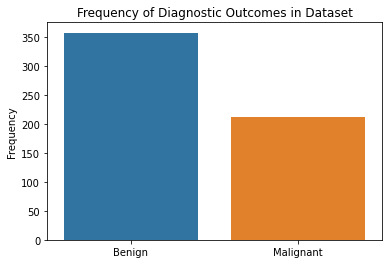

In [ ]:
# Visualize frequency of diagnoses in dataset
sns.barplot(x = ['Benign', 'Malignant'], y = 'diagnosis', data = outcome_count, alpha = 1)
plt.title('Frequency of Diagnostic Outcomes in Dataset')
plt.ylabel('Frequency')
plt.show()

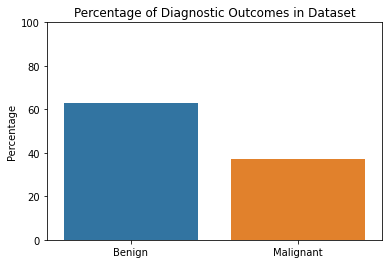

In [ ]:
# Visualize frequency of diagnoses in dataset
sns.barplot(x = ['Benign', 'Malignant'], y = 'Percent', data = outcome_count, alpha = 1)
plt.title('Percentage of Diagnostic Outcomes in Dataset')
plt.ylabel('Percentage')
plt.ylim(0,100)
plt.show()

## Visual Inspection of data looking at distrubution/variance for histology of benign and malignant tumors

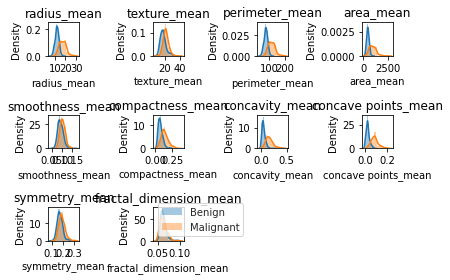

In [ ]:
# Visual Inspection of data looking at distrubution/variance for histology of benign and malignant tumors

# Instantiate a figure object for OOP figure manipulation.
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(df.columns[2:12])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    sns.distplot(df_n[b], kde=True, label='Benign')
    sns.distplot(df_y[b], kde=True, label='Malignant')
   
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show() 


## Visualize tumor characteristics for positive and negatives diagnoses 

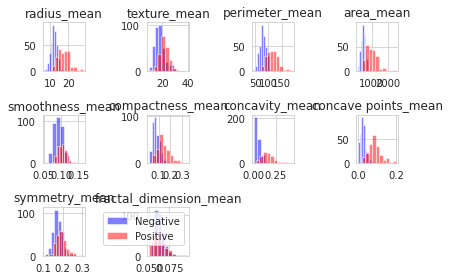

In [ ]:
# Visualize tumor characteristics for positive and negatives diagnoses 


# Instantiate figure object
fig = plt.figure()
#plt.sup_title('Tumor Characteristic (means)')

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(df.columns[2:12])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(df_n[b], label = 'Negative', stacked = True, alpha=0.5, color= 'b')
    ax.hist(df_y[b], label= 'Positive', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(b)


sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()  

It looks like mean radius, perimeter, compactness concave points and concavity most clearly segregate between diagnosis

# Data Preprocessing







## Convert diagnosis to 1 and 0

In [151]:
# convert diagnosis to 1 and 0
#diagnosis = {'M': 1,'B': 0}

#df.diagnosis = [diagnosis[item] for item in df.diagnosis]

df["diagnosis"]=df["diagnosis"].replace({"M":1, "B":0})

df.head()

,image_id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,2,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,3,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,4,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,5,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Normalisation

Range for the data for each input is different, large data becomes dominant in training.

Map each data dimension to -1, +1.

For each input attribute

In [152]:
def normalisation(column):

    lower_bound = min(column)

    upper_bound = max(column)

    shifted_lower_bound = 0.8 * lower_bound

    shifted_upper_bound = 1.2 * upper_bound


    return [(x - lower_bound)/(shifted_upper_bound - shifted_lower_bound) for x in column]

In [153]:
def my_func(df, not_these):
    selected_col = df.columns.drop(not_these)
    for each_col in selected_col:
        df[(str(each_col) + "_normalised")] = normalisation(df[each_col])
    return df

In [154]:
df2 = my_func(df, ["diagnosis", "image_id"])

df2.head()

,image_id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst_normalised,texture_worst_normalised,perimeter_worst_normalised,area_worst_normalised,smoothness_worst_normalised,compactness_worst_normalised,concavity_worst_normalised,concave points_worst_normalised,symmetry_worst_normalised,fractal_dimension_worst_normalised
0,1,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,0.472848,0.106558,0.513917,0.369968,0.433097,0.511561,0.473842,0.760023,0.452216,0.311561
1,2,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,0.462281,0.228568,0.415109,0.357258,0.250400,0.127676,0.160809,0.532646,0.176507,0.165782
2,3,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,0.423802,0.271111,0.390982,0.307426,0.348409,0.318336,0.299787,0.695876,0.305052,0.158756
3,4,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,0.189139,0.290576,0.185591,0.077169,0.659565,0.672409,0.457202,0.737400,0.755630,0.575504
4,5,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,0.395892,0.093314,0.389833,0.280392,0.315105,0.142422,0.266241,0.465349,0.119012,0.106065


In [ ]:
list(df.columns)

['image_id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'radius_mean_normalised',
 'texture_mean_normalised',
 'perimeter_mean_normalised',
 'area_mean_normalised',
 'smoothness_mean_normalised',
 'compactness_mean_normalised',
 'concavity_mean_normalised',
 'concave points_mean_normalised',
 'symmetry_mean_normalised',
 'fractal_dimension_mean_normalised',
 'radius_se_normalised',
 'texture_se_normalised',
 'perimeter_se_normalised',
 'area_se_norm

In [155]:
normalised_cols = [col for col in df2.columns if 'normalised' in col]
#print(list(df2.columns))
print(normalised_cols)

['radius_mean_normalised', 'texture_mean_normalised', 'perimeter_mean_normalised', 'area_mean_normalised', 'smoothness_mean_normalised', 'compactness_mean_normalised', 'concavity_mean_normalised', 'concave points_mean_normalised', 'symmetry_mean_normalised', 'fractal_dimension_mean_normalised', 'radius_se_normalised', 'texture_se_normalised', 'perimeter_se_normalised', 'area_se_normalised', 'smoothness_se_normalised', 'compactness_se_normalised', 'concavity_se_normalised', 'concave points_se_normalised', 'symmetry_se_normalised', 'fractal_dimension_se_normalised', 'radius_worst_normalised', 'texture_worst_normalised', 'perimeter_worst_normalised', 'area_worst_normalised', 'smoothness_worst_normalised', 'compactness_worst_normalised', 'concavity_worst_normalised', 'concave points_worst_normalised', 'symmetry_worst_normalised', 'fractal_dimension_worst_normalised']


In [156]:
df3 = df2[[*normalised_cols]]

df3.head()

,radius_mean_normalised,texture_mean_normalised,perimeter_mean_normalised,area_mean_normalised,smoothness_mean_normalised,compactness_mean_normalised,concavity_mean_normalised,concave points_mean_normalised,symmetry_mean_normalised,fractal_dimension_mean_normalised,...,radius_worst_normalised,texture_worst_normalised,perimeter_worst_normalised,area_worst_normalised,smoothness_worst_normalised,compactness_worst_normalised,concavity_worst_normalised,concave points_worst_normalised,symmetry_worst_normalised,fractal_dimension_worst_normalised
0,0.391122,0.017019,0.413301,0.297083,0.427144,0.647207,0.585950,0.609261,0.485357,0.373571,...,0.472848,0.106558,0.513917,0.369968,0.433097,0.511561,0.473842,0.760023,0.452216,0.311561
1,0.482783,0.204735,0.466134,0.409680,0.208539,0.148530,0.169674,0.290631,0.268571,0.087188,...,0.462281,0.228568,0.415109,0.357258,0.250400,0.127676,0.160809,0.532646,0.176507,0.165782
2,0.451519,0.293131,0.450965,0.367066,0.369993,0.352202,0.385426,0.529738,0.360357,0.130327,...,0.423802,0.271111,0.390982,0.307426,0.348409,0.318336,0.299787,0.695876,0.305052,0.158756
3,0.157707,0.271032,0.176756,0.084049,0.583662,0.662997,0.471337,0.435719,0.548929,0.616944,...,0.189139,0.290576,0.185591,0.077169,0.659565,0.672409,0.457202,0.737400,0.755630,0.575504
4,0.472836,0.117608,0.477643,0.399633,0.309594,0.284278,0.386598,0.431991,0.267500,0.115255,...,0.395892,0.093314,0.389833,0.280392,0.315105,0.142422,0.266241,0.465349,0.119012,0.106065


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   radius_mean_normalised              569 non-null    float64
 1   texture_mean_normalised             569 non-null    float64
 2   perimeter_mean_normalised           569 non-null    float64
 3   area_mean_normalised                569 non-null    float64
 4   smoothness_mean_normalised          569 non-null    float64
 5   compactness_mean_normalised         569 non-null    float64
 6   concavity_mean_normalised           569 non-null    float64
 7   concave points_mean_normalised      569 non-null    float64
 8   symmetry_mean_normalised            569 non-null    float64
 9   fractal_dimension_mean_normalised   569 non-null    float64
 10  radius_se_normalised                569 non-null    float64
 11  texture_se_normalised               569 non-n

In [157]:
df3['diagnosis']=df2.diagnosis

df3

,radius_mean_normalised,texture_mean_normalised,perimeter_mean_normalised,area_mean_normalised,smoothness_mean_normalised,compactness_mean_normalised,concavity_mean_normalised,concave points_mean_normalised,symmetry_mean_normalised,fractal_dimension_mean_normalised,...,texture_worst_normalised,perimeter_worst_normalised,area_worst_normalised,smoothness_worst_normalised,compactness_worst_normalised,concavity_worst_normalised,concave points_worst_normalised,symmetry_worst_normalised,fractal_dimension_worst_normalised,diagnosis
0,0.391122,0.017019,0.413301,0.297083,0.427144,0.647207,0.585950,0.609261,0.485357,0.373571,...,0.106558,0.513917,0.369968,0.433097,0.511561,0.473842,0.760023,0.452216,0.311561,1
1,0.482783,0.204735,0.466134,0.409680,0.208539,0.148530,0.169674,0.290631,0.268571,0.087188,...,0.228568,0.415109,0.357258,0.250400,0.127676,0.160809,0.532646,0.176507,0.165782,1
2,0.451519,0.293131,0.450965,0.367066,0.369993,0.352202,0.385426,0.529738,0.360357,0.130327,...,0.271111,0.390982,0.307426,0.348409,0.318336,0.299787,0.695876,0.305052,0.158756,1
3,0.157707,0.271032,0.176756,0.084049,0.583662,0.662997,0.471337,0.435719,0.548929,0.616944,...,0.290576,0.185591,0.077169,0.659565,0.672409,0.457202,0.737400,0.755630,0.575504,1
4,0.472836,0.117608,0.477643,0.399633,0.309594,0.284278,0.386598,0.431991,0.267500,0.115255,...,0.093314,0.389833,0.280392,0.315105,0.142422,0.266241,0.465349,0.119012,0.106065,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.517956,0.322089,0.513737,0.462687,0.379085,0.241919,0.476218,0.575298,0.237857,0.081471,...,0.288570,0.443067,0.371582,0.332233,0.147471,0.273363,0.634593,0.073731,0.078598,1
565,0.467151,0.470941,0.457242,0.387160,0.293357,0.210589,0.281162,0.405525,0.247143,0.069777,...,0.526369,0.400556,0.311864,0.216144,0.132164,0.213991,0.466208,0.149994,0.055277,1
566,0.341739,0.466623,0.337452,0.247575,0.207305,0.207832,0.180627,0.219599,0.189286,0.084719,...,0.443490,0.292173,0.189402,0.203298,0.226092,0.226504,0.406071,0.097265,0.112993,1
567,0.483849,0.498374,0.503798,0.388546,0.423248,0.645703,0.686114,0.629556,0.477500,0.262474,...,0.549847,0.513917,0.330022,0.446418,0.673851,0.624800,0.758877,0.375655,0.336443,1


# Training and Testing Split

I will now split the data 70% of the instances are reserved for neural network training and 30% of the instances are reserved for testing the performance of the trained neural network.

In [158]:
mask = np.random.rand(len(df3)) < 0.7

In [159]:
train = df3[mask]

In [160]:
test = df3[~mask]

In [161]:
print(len(df3))
print(len(train))
print(len(test))

569
413
156


In [162]:
train.head()

,radius_mean_normalised,texture_mean_normalised,perimeter_mean_normalised,area_mean_normalised,smoothness_mean_normalised,compactness_mean_normalised,concavity_mean_normalised,concave points_mean_normalised,symmetry_mean_normalised,fractal_dimension_mean_normalised,...,texture_worst_normalised,perimeter_worst_normalised,area_worst_normalised,smoothness_worst_normalised,compactness_worst_normalised,concavity_worst_normalised,concave points_worst_normalised,symmetry_worst_normalised,fractal_dimension_worst_normalised,diagnosis
0,0.391122,0.017019,0.413301,0.297083,0.427144,0.647207,0.585950,0.609261,0.485357,0.373571,...,0.106558,0.513917,0.369968,0.433097,0.511561,0.473842,0.760023,0.452216,0.311561,1
2,0.451519,0.293131,0.450965,0.367066,0.369993,0.352202,0.385426,0.529738,0.360357,0.130327,...,0.271111,0.390982,0.307426,0.348409,0.318336,0.299787,0.695876,0.305052,0.158756,1
3,0.157707,0.271032,0.176756,0.084049,0.583662,0.662997,0.471337,0.435719,0.548929,0.616944,...,0.290576,0.185591,0.077169,0.659565,0.672409,0.457202,0.737400,0.755630,0.575504,1
4,0.472836,0.117608,0.477643,0.399633,0.309594,0.284278,0.386598,0.431991,0.267500,0.115255,...,0.093314,0.389833,0.280392,0.315105,0.142422,0.266241,0.465349,0.119012,0.106065,1
5,0.194300,0.152154,0.202858,0.115576,0.488193,0.377516,0.308107,0.335031,0.366786,0.340047,...,0.235391,0.202940,0.112253,0.513502,0.398800,0.356430,0.498568,0.360462,0.338394,1


In [163]:
test.head()

,radius_mean_normalised,texture_mean_normalised,perimeter_mean_normalised,area_mean_normalised,smoothness_mean_normalised,compactness_mean_normalised,concavity_mean_normalised,concave points_mean_normalised,symmetry_mean_normalised,fractal_dimension_mean_normalised,...,texture_worst_normalised,perimeter_worst_normalised,area_worst_normalised,smoothness_worst_normalised,compactness_worst_normalised,concavity_worst_normalised,concave points_worst_normalised,symmetry_worst_normalised,fractal_dimension_worst_normalised,diagnosis
1,0.482783,0.204735,0.466134,0.409680,0.208539,0.148530,0.169674,0.290631,0.268571,0.087188,...,0.228568,0.415109,0.357258,0.250400,0.127676,0.160809,0.532646,0.176507,0.165782,1
18,0.455782,0.315993,0.450965,0.386814,0.296670,0.208835,0.288777,0.393390,0.186429,0.051845,...,0.378472,0.522343,0.446431,0.380762,0.230580,0.357561,0.683849,0.179189,0.102992,1
22,0.296974,0.115576,0.307112,0.194325,0.355055,0.486546,0.405537,0.404076,0.521786,0.264553,...,0.141676,0.286046,0.160532,0.322717,0.455301,0.419662,0.685281,0.462047,0.216717,1
25,0.360924,0.169935,0.377731,0.266491,0.428443,0.521886,0.435216,0.580268,0.707143,0.314059,...,0.188232,0.390599,0.257392,0.396462,0.294614,0.256456,0.730241,0.372527,0.248136,1
28,0.295553,0.395245,0.306589,0.204026,0.360900,0.376765,0.328608,0.362450,0.309286,0.200624,...,0.495465,0.378726,0.218656,0.442136,0.467803,0.421659,0.579611,0.366718,0.213302,1


In [ ]:
# Split a dataset into a train and test set
#def train_test_split(dataset, split):
    #train = list()
    #train_size = split * len(dataset)
    #dataset_copy = list(dataset)
    #while len(train) < train_size:
        #index = randrange(len(dataset_copy))
        #train.append(dataset_copy.pop(index))
    #return train, dataset_copy

# Perceptrons Training Algorithm

* Initialisation

* Activation

* Weight Training

30 neurons 30 features

inputs

outputs 2x15 matrix

weights will be 15 rows and 30 columns 15x30


## 15 Neurons


### Inputs

In [164]:
train.columns

Index(['radius_mean_normalised', 'texture_mean_normalised',
       'perimeter_mean_normalised', 'area_mean_normalised',
       'smoothness_mean_normalised', 'compactness_mean_normalised',
       'concavity_mean_normalised', 'concave points_mean_normalised',
       'symmetry_mean_normalised', 'fractal_dimension_mean_normalised',
       'radius_se_normalised', 'texture_se_normalised',
       'perimeter_se_normalised', 'area_se_normalised',
       'smoothness_se_normalised', 'compactness_se_normalised',
       'concavity_se_normalised', 'concave points_se_normalised',
       'symmetry_se_normalised', 'fractal_dimension_se_normalised',
       'radius_worst_normalised', 'texture_worst_normalised',
       'perimeter_worst_normalised', 'area_worst_normalised',
       'smoothness_worst_normalised', 'compactness_worst_normalised',
       'concavity_worst_normalised', 'concave points_worst_normalised',
       'symmetry_worst_normalised', 'fractal_dimension_worst_normalised',
       'diagnosis'],

In [165]:
inputs = train[['radius_mean_normalised', 'texture_mean_normalised',
       'perimeter_mean_normalised', 'area_mean_normalised',
       'smoothness_mean_normalised', 'compactness_mean_normalised',
       'concavity_mean_normalised', 'concave points_mean_normalised',
       'symmetry_mean_normalised', 'fractal_dimension_mean_normalised',
       'radius_se_normalised', 'texture_se_normalised',
       'perimeter_se_normalised', 'area_se_normalised',
       'smoothness_se_normalised', 'compactness_se_normalised',
       'concavity_se_normalised', 'concave points_se_normalised',
       'symmetry_se_normalised', 'fractal_dimension_se_normalised',
       'radius_worst_normalised', 'texture_worst_normalised',
       'perimeter_worst_normalised', 'area_worst_normalised',
       'smoothness_worst_normalised', 'compactness_worst_normalised',
       'concavity_worst_normalised', 'concave points_worst_normalised',
       'symmetry_worst_normalised', 'fractal_dimension_worst_normalised']].to_numpy()

print(inputs.shape)

print(len(inputs))
inputs

(413, 30)
413


array([[0.39112239, 0.0170189 , 0.41330139, ..., 0.76002291, 0.4522164 ,
        0.31156083],
       [0.45151916, 0.29313148, 0.4509646 , ..., 0.69587629, 0.30505243,
        0.15875649],
       [0.15770663, 0.27103231, 0.17675552, ..., 0.73739977, 0.75563036,
        0.57550447],
       ...,
       [0.495218  , 0.39067263, 0.51896761, ..., 0.7279496 , 0.20316969,
        0.21315522],
       [0.48384919, 0.49837431, 0.50379771, ..., 0.75887743, 0.37565539,
        0.33644276],
       [0.02767593, 0.37670189, 0.02160403, ..., 0.        , 0.19453051,
        0.07488974]])

### Outputs

In [166]:
outputs = train[['diagnosis']].to_numpy()

print(outputs.shape)

outputs[0:5]

(413, 1)


array([[1],
       [1],
       [1],
       [1],
       [1]])

In [167]:
outputs = [[-1,1] if i==0 else [1,-1] for i in outputs]
outputs[0:5]



[[1, -1], [1, -1], [1, -1], [1, -1], [1, -1]]

### Weights

In [168]:
# Initializing our weights with random values
# We have 30 input parameter
# The 15 represents the number of neuron in the hidden layer
# These weights are for the connection between the inputs and the hidden layer
weights_0 = 2 * np.random.random((30, 15)) - 1

# The 15 represents the number of neuron in the hidden layer
# The 2 means we have 2 outputs to the hidden layer
# These weights are for the connection between the  hidden layer and the output
weights_1 = 2 * np.random.random((15, 2)) - 1 # need to split output column

### Bias

In [169]:
# bias for hidden layers and output layers
bias0 = np.random.uniform(size = 15, low =-1, high=1)
bias1 = np.random.uniform(size = 2, low =-1, high=1)



5.5.	Construct a 3-layers feedforward network with 30 input neurons, 15 hidden neurons, and 2 output neurons. Thus, we encode the class labels using 2D vectors with bipolar elements, i.e. either [+1,−1] or either [−1,+1]. Determine the activation functions you use in the hidden layer and output layer.

### Activation Functions

In [170]:
# This is the sigmoid Function
def bp_sigmoid(sum):
  return ((1 - np.exp(-sum))/(1 + np.exp(-sum)))

#This is the sigmoid derivative as used before
def der_bp_sigmoid_derivative(bp_sigmoid):
  return 0.5 *(1-np.square(bp_sigmoid))

### Model

In [171]:

# Notes
# try different epochs
# bias is a fixed value, maybe add it that it learns it as the weights
# try different learning rates, keep it really small, 0.01, 0.03, 0.025





# number of times the learning model will
# work through the data
epochs = 80000


learning_rate = 0.001
error = []

#Neural network using a bipolar sigmoid function
for epoch in range(epochs):
  input_layer = inputs
  # "sum_synapse_0" This holds the sum function total of weights for the hidden layer
  sum_synapse0 = np.dot(input_layer, weights_0)
  sum_synapse0 += bias0
  # Computing the Sigmoid function for the Hidden layer
  hidden_layer = bp_sigmoid(sum_synapse0)
  
  # "sum_synapse_1" This holds the sum function total of weights for the output layer
  sum_synapse1 = np.dot(hidden_layer, weights_1)
  sum_synapse1 += bias1
  # output_layer holds the results of our application of the sigmoid
  output_layer = bp_sigmoid(sum_synapse1)

  error_output_layer = outputs - output_layer
  average = np.mean(abs(error_output_layer))
    #print after every specified range of the value
  if epoch % 1000 == 0:
    print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(average))
    error.append(average)
  
  # derivative_output is our Derivative of the activation function (sigmoid)
  derivative_output = der_bp_sigmoid_derivative(output_layer)
  delta_output = error_output_layer * derivative_output
  
  weights_1T = weights_1.T
  delta_output_weight = delta_output.dot(weights_1T)
  delta_hidden_layer = delta_output_weight * der_bp_sigmoid_derivative(hidden_layer)
  
  hidden_layerT = hidden_layer.T
  input_x_delta1 = hidden_layerT.dot(delta_output)
  weights_1 = weights_1 + (input_x_delta1 * learning_rate)
  
  input_layerT = input_layer.T
  input_x_delta0 = input_layerT.dot(delta_hidden_layer)
  weights_0 = weights_0 + (input_x_delta0 * learning_rate)

Epoch: 1 Error: 1.088621113894063
Epoch: 1001 Error: 0.15151993810427383
Epoch: 2001 Error: 0.10786255411716951
Epoch: 3001 Error: 0.08960279613513256
Epoch: 4001 Error: 0.07905213400614819
Epoch: 5001 Error: 0.07183219143617202
Epoch: 6001 Error: 0.06633247187051551
Epoch: 7001 Error: 0.061840369270015044
Epoch: 8001 Error: 0.05800520578886593
Epoch: 9001 Error: 0.05464402813019331
Epoch: 10001 Error: 0.05165640333415771
Epoch: 11001 Error: 0.048983478998158025
Epoch: 12001 Error: 0.04658818299419998
Epoch: 13001 Error: 0.04444598375065534
Epoch: 14001 Error: 0.0425415999235899
Epoch: 15001 Error: 0.04087005219616431
Epoch: 16001 Error: 0.03944259537083379
Epoch: 17001 Error: 0.038297596709399286
Epoch: 18001 Error: 0.03748484923549027
Epoch: 19001 Error: 0.03686256418939464
Epoch: 20001 Error: 0.03600336964887672
Epoch: 21001 Error: 0.03484411185420242
Epoch: 22001 Error: 0.033558365071421584
Epoch: 23001 Error: 0.032255895131737086
Epoch: 24001 Error: 0.030989757602489978
Epoch: 250

### Results

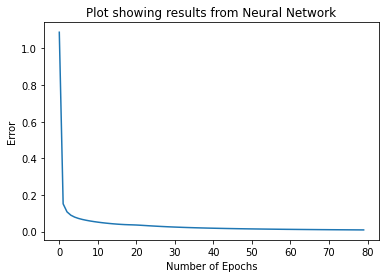

In [172]:
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.title('Plot showing results from Neural Network')
plt.plot(error)
plt.show()

### Comparing the outputs and predictions

In [132]:
#outputs

for each_item in range(0,377):
  print(outputs[each_item][0],outputs[each_item][1], output_layer[each_item][0], output_layer[each_item][1])



1 -1 0.9999999999991002 -0.9999999999991424
1 -1 0.9999999999832058 -0.999999999981279
1 -1 0.9999999786267458 -0.9999999817797154
1 -1 0.9999995231878817 -0.9999994797364508
1 -1 0.9999987658912651 -0.9999988881897698
1 -1 0.9999999989120907 -0.9999999988064102
1 -1 0.9999654997232644 -0.9999634476037482
1 -1 0.9999999872317018 -0.99999998829856
1 -1 0.9999999926220319 -0.9999999920455263
1 -1 0.9999684122124888 -0.9999640717668857
1 -1 0.9999999756742989 -0.999999973252597
1 -1 0.9552473817884103 -0.9371075514865508
1 -1 0.8880182583445445 -0.8797581908575588
1 -1 0.9999824895886201 -0.9999830901246326
1 -1 0.999999996104184 -0.9999999956112798
1 -1 0.9999999999851314 -0.9999999999848346
1 -1 0.9999999999997965 -0.9999999999997179
-1 1 -0.9854709876609208 0.9848343346560642
1 -1 0.9999999999115219 -0.9999999999134769
1 -1 0.9999999995034955 -0.9999999995151022
1 -1 0.9999999854097835 -0.9999999807708211
1 -1 0.9999999999698184 -0.9999999999664998
1 -1 0.9999999655739834 -0.9999999682

### Accuracy

In [175]:
output_layer = np.round(output_layer, decimals = 0)

output_layer[0:5]

array([[ 1., -1.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1., -1.]])

In [176]:
outputs[0:5]

[[1, -1], [1, -1], [1, -1], [1, -1], [1, -1]]

In [177]:
# calculate accuracy
from sklearn import metrics

print(metrics.accuracy_score(outputs,output_layer))

1.0


### Confusion Matrix

In [178]:
print(metrics.confusion_matrix(outputs, output_layer))

ValueError: ignored

In [179]:
print('True', outputs.values[0:25])
print('Pred', output_layer[0:25])

AttributeError: ignored

In [ ]:
confusion = metrics.confusion_matrix(outputs, output_layer)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

### Accuracy and Recall Score

In [140]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(outputs,output_layer))

NameError: ignored

In [ ]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(outputs,output_layer))

In [ ]:
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(outputs,output_layer))

In [ ]:
specificity = TN / (TN + FP)
print(specificity)

In [ ]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

In [ ]:
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(outputs,output_layer))

### F1 Score

In [ ]:
from sklearn.metrics import f1_score
F1_score = 2*((precision*sensitivity)/(precision+sensitivity))
print(F1_score)
print(metrics.f1_score(outputs,output_layer))

###ROC Curve and AUC

In [ ]:
auc = metrics.roc_auc_score(outputs,output_layer)
print('AUC:' + str(auc))

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr, label = "AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## 5 Neurons

### Weights

In [ ]:
# These weights are for the connection between the inputs and the hidden layer
weights_0 = 2 * np.random.random((30, 5)) - 1 # 5 neurons

# These weights are for the connection between the  hidden layer and the output
weights_1 = 2 * np.random.random((5, 2)) - 1

### Bias

In [ ]:
# bias for hidden layers and output layers
bias0 = np.random.uniform(size = 5, low =-1, high=1)
bias1 = np.random.uniform(size = 2, low =-1, high=1)

### Model

In [ ]:
# Notes
# try different epochs
# bias is a fixed value, maybe add it that it learns it as the weights
# try different learning rates, keep it really small, 0.01, 0.03, 0.025





# number of times the learning model will
# work through the data
epochs = 80000


learning_rate = 0.001
error = []

#Neural network using a bipolar sigmoid function
for epoch in range(epochs):
  input_layer = inputs
  sum_synapse0 = np.dot(input_layer, weights_0)
  sum_synapse0 += bias0
  hidden_layer = bp_sigmoid(sum_synapse0)

  sum_synapse1 = np.dot(hidden_layer, weights_1)
  sum_synapse1 += bias1
  output_layer = bp_sigmoid(sum_synapse1)

  error_output_layer = outputs - output_layer
  average = np.mean(abs(error_output_layer))
    #print after every specified range of the value
  if epoch % 1000 == 0:
    print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(average))
    error.append(average)
  
  derivative_output = der_bp_sigmoid_derivative(output_layer)
  delta_output = error_output_layer * derivative_output
  
  weights_1T = weights_1.T
  delta_output_weight = delta_output.dot(weights_1T)
  delta_hidden_layer = delta_output_weight * der_bp_sigmoid_derivative(hidden_layer)
  
  hidden_layerT = hidden_layer.T
  input_x_delta1 = hidden_layerT.dot(delta_output)
  weights_1 = weights_1 + (input_x_delta1 * learning_rate)
  
  input_layerT = input_layer.T
  input_x_delta0 = input_layerT.dot(delta_hidden_layer)
  weights_0 = weights_0 + (input_x_delta0 * learning_rate)

Epoch: 1 Error: 1.0052200972179435
Epoch: 1001 Error: 0.17976976677366216
Epoch: 2001 Error: 0.1277357735094567
Epoch: 3001 Error: 0.1052153110927875
Epoch: 4001 Error: 0.09283480441777019
Epoch: 5001 Error: 0.08465950250077847
Epoch: 6001 Error: 0.07863666939518728
Epoch: 7001 Error: 0.07389280679045691
Epoch: 8001 Error: 0.06996723973749056
Epoch: 9001 Error: 0.06657660257176937
Epoch: 10001 Error: 0.06353200671344687
Epoch: 11001 Error: 0.06070866085334162
Epoch: 12001 Error: 0.05803558729441715
Epoch: 13001 Error: 0.055485309306252756
Epoch: 14001 Error: 0.05305598603548725
Epoch: 15001 Error: 0.05075387301269196
Epoch: 16001 Error: 0.04858448545904686
Epoch: 17001 Error: 0.04655035691955515
Epoch: 18001 Error: 0.04465035547801318
Epoch: 19001 Error: 0.04287945999735646
Epoch: 20001 Error: 0.04122949550148407
Epoch: 21001 Error: 0.039690527407582145
Epoch: 22001 Error: 0.03825221790546264
Epoch: 23001 Error: 0.036904751504018715
Epoch: 24001 Error: 0.03563930150869528
Epoch: 25001 

### Results

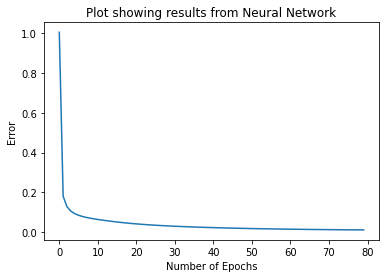

In [ ]:
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.title('Plot showing results from Neural Network')
plt.plot(error)
plt.show()

## 40 Neurons

### Weights

In [ ]:
# These weights are for the connection between the inputs and the hidden layer
weights_0 = 2 * np.random.random((30, 40)) - 1 # 40 neurons

# These weights are for the connection between the  hidden layer and the output
weights_1 = 2 * np.random.random((40, 2)) - 1

### Bias

In [ ]:
# bias for hidden layers and output layers
bias0 = np.random.uniform(size = 40, low =-1, high=1)
bias1 = np.random.uniform(size = 2, low =-1, high=1)

### Model

In [ ]:
# Notes
# try different epochs
# bias is a fixed value, maybe add it that it learns it as the weights
# try different learning rates, keep it really small, 0.01, 0.03, 0.025





# number of times the learning model will
# work through the data
epochs = 80000


learning_rate = 0.001
error = []

#Neural network using a bipolar sigmoid function
for epoch in range(epochs):
  input_layer = inputs
  sum_synapse0 = np.dot(input_layer, weights_0)
  sum_synapse0 += bias0
  hidden_layer = bp_sigmoid(sum_synapse0)

  sum_synapse1 = np.dot(hidden_layer, weights_1)
  sum_synapse1 += bias1
  output_layer = bp_sigmoid(sum_synapse1)

  error_output_layer = outputs - output_layer
  average = np.mean(abs(error_output_layer))
    #print after every specified range of the value
  if epoch % 1000 == 0:
    print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(average))
    error.append(average)
  
  derivative_output = der_bp_sigmoid_derivative(output_layer)
  delta_output = error_output_layer * derivative_output
  
  weights_1T = weights_1.T
  delta_output_weight = delta_output.dot(weights_1T)
  delta_hidden_layer = delta_output_weight * der_bp_sigmoid_derivative(hidden_layer)
  
  hidden_layerT = hidden_layer.T
  input_x_delta1 = hidden_layerT.dot(delta_output)
  weights_1 = weights_1 + (input_x_delta1 * learning_rate)
  
  input_layerT = input_layer.T
  input_x_delta0 = input_layerT.dot(delta_hidden_layer)
  weights_0 = weights_0 + (input_x_delta0 * learning_rate)

Epoch: 1 Error: 1.0831817582980476
Epoch: 1001 Error: 0.1397899101891179
Epoch: 2001 Error: 0.10142706398426918
Epoch: 3001 Error: 0.08371838177331432
Epoch: 4001 Error: 0.07340526062681056
Epoch: 5001 Error: 0.0664502962228948
Epoch: 6001 Error: 0.06131734799944519
Epoch: 7001 Error: 0.05730117313801383
Epoch: 8001 Error: 0.05402095443968409
Epoch: 9001 Error: 0.051241138894850664
Epoch: 10001 Error: 0.04880339446655126
Epoch: 11001 Error: 0.046602545112257567
Epoch: 12001 Error: 0.04457458120353381
Epoch: 13001 Error: 0.042683566515250876
Epoch: 14001 Error: 0.040909009751285454
Epoch: 15001 Error: 0.03923745123896009
Epoch: 16001 Error: 0.037658216720241555
Epoch: 17001 Error: 0.03616164224897562
Epoch: 18001 Error: 0.03473855361970001
Epoch: 19001 Error: 0.033380517863377666
Epoch: 20001 Error: 0.032080699541767295
Epoch: 21001 Error: 0.03083497326963773
Epoch: 22001 Error: 0.0296424957625199
Epoch: 23001 Error: 0.028504929416846965
Epoch: 24001 Error: 0.027424464391663725
Epoch: 2

### Results

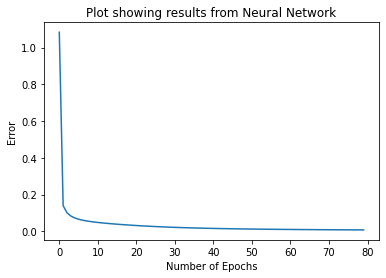

In [ ]:
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.title('Plot showing results from Neural Network')
plt.plot(error)
plt.show()

# Part Two

## Import Packages

In [ ]:
# Import all needed libraries and sublibraries

import tensorflow as tf

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import keras

import numpy as np

from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import regularizers

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

## Import data

In [ ]:
# Import input (x) and output (y) data, and asign these to df1 and df2

df1 = pd.read_csv('X_data.csv')

df2 = pd.read_csv('Y_data.csv')

In [ ]:
df1.head()

,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [ ]:
df2.head()

,1
0,1
1,1
2,1
3,1
4,1


# Scale the data

In [ ]:
# Scale input data

df1 = preprocessing.scale(df1)

df1

array([[ 1.83208378, -0.35832707,  1.68910604, ...,  1.09526221,
        -0.24044363,  0.28529387],
       [ 1.58210603,  0.45385958,  1.56958968, ...,  1.96646779,
         1.16385786,  0.2053006 ],
       [-0.76711673,  0.25081292, -0.59077158, ...,  2.18809026,
         6.08623563,  4.95045676],
       ...,
       [ 0.70434323,  2.04789258,  0.6752776 , ...,  0.41969578,
        -1.10613122, -0.31576665],
       [ 1.84060575,  2.33962629,  1.98583632, ...,  2.30272257,
         1.93516598,  2.22846365],
       [-1.80679694,  1.22170271, -1.81313547, ..., -1.74761915,
        -0.04354852, -0.74961903]])

# Train test split

In [ ]:
# Split the data into input (x) training and testing data, and ouput (y) training and testing data, 
# with training data being 80% of the data, and testing data being the remaining 20% of the data

X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)

# Logistic Regression

In [ ]:
# Define a "shallow" logistic regression model

model = Sequential()
          # 13 neurons                 # 30 neurons
          # this connects to a single hidden layer with 13 neurons
model.add(Dense(13,input_shape=(30,), activation='relu')) # could use sigmoid here
model.add(Dense(1, activation='sigmoid'))      
                                                        # learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy']) # try a different optimiser

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Pass several parameters to 'EarlyStopping' function and assign it to 'earlystopper'

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fit model over 2000 iterations with 'earlystopper' callback, and assign it to history

history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.15, verbose = 0, 
                    callbacks = [earlystopper])

history_dict=history.history

Epoch 174: early stopping


In [ ]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

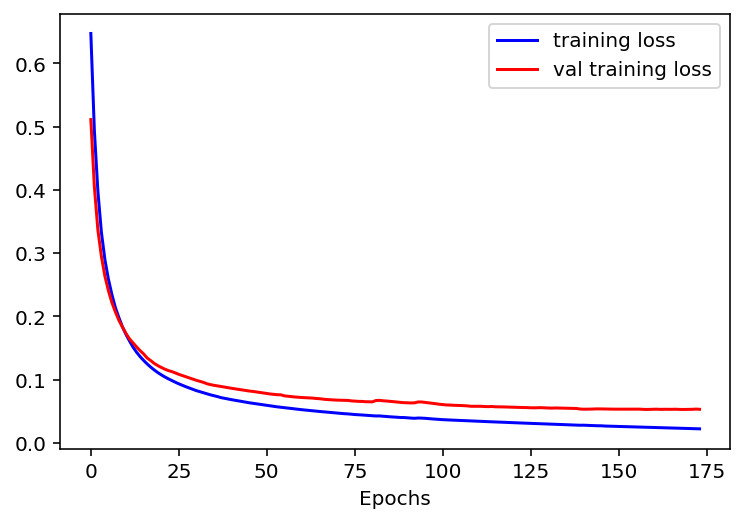

In [ ]:
# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

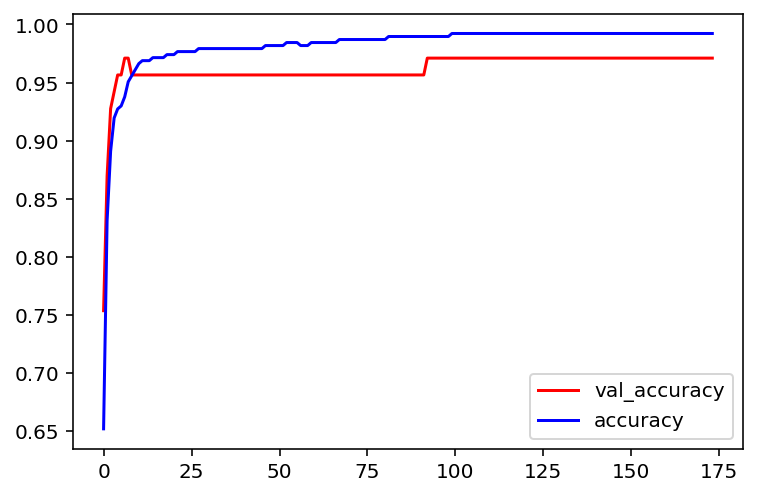

In [ ]:
# Plot accuracy over the epochs

accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()

In [ ]:
# Calculate loss and accuracy of testing data
loss, acc = model.evaluate(X_test, y_test)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

4/4 [==============================] - 0s 5ms/step - loss: 0.1099 - accuracy: 0.9825
Test loss:  0.1098860576748848
Test accuracy:  0.9824561476707458


In [ ]:
# AUC score of testing data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#y_test_pred = model.predict_proba(X_test)

y_test_pred=model.predict(X_test) 
classes_x=np.argmax(y_test_pred,axis=1)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_test_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9898305084745762


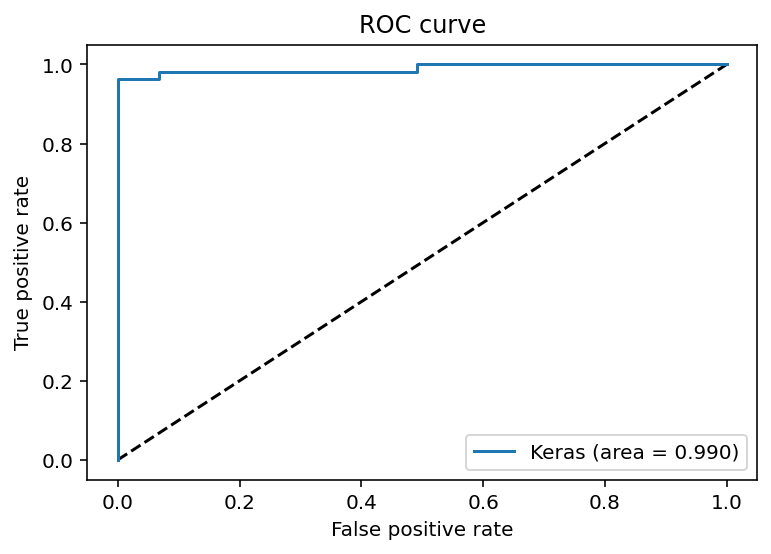

In [ ]:
# ROC curve of testing data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
# AUC score of training data
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#y_train_pred = model.predict_proba(X_train)

y_train_pred=model.predict(X_train) 
classes_x=np.argmax(y_train_pred,axis=1)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train,y_train_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Training data AUC: ', auc_keras)

Training data AUC:  0.9996773360867321


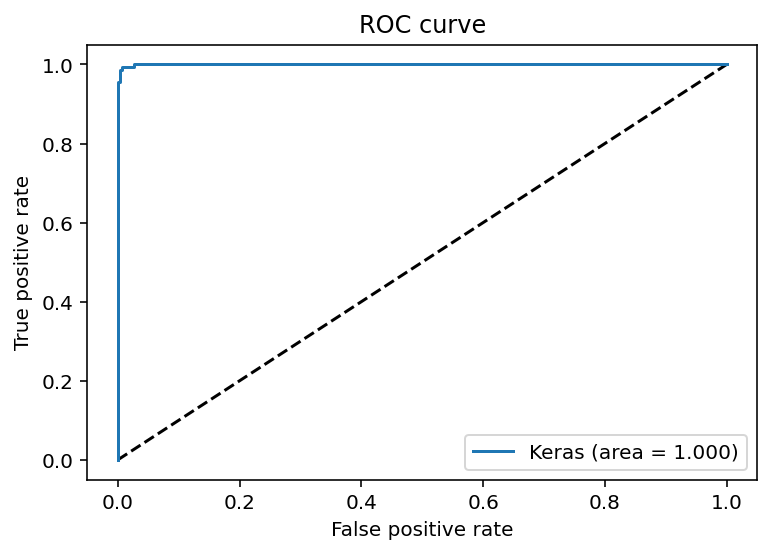

In [ ]:
# ROC curve of training data
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()